<a href="https://colab.research.google.com/github/goldenspring6622/CS114.M21.N02/blob/main/Toxic_Comment_Detection_On_Youtube_Football_Livestream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORT PACKAGES

In [6]:
!pip list

Package                       Version
----------------------------- ------------------------------
absl-py                       1.1.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.4
Babel                         2.10.2
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.0
blis                          0.7.7
bokeh                         2.3.3
branca                        0.5.0
bs4                           0.0.1
CacheControl                  0.

In [7]:
! pip install openpyxl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install chat_downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [9]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!pip3 install  xlrd==1.2.0
!pip install --upgrade pandas
!pip install underthesea
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import time
from pandas import Series, DataFrame
import xlrd
from sklearn.feature_extraction.text import TfidfVectorizer
from xlrd import open_workbook
from underthesea import word_tokenize #https://pypi.org/project/underthesea/ anhv.ict91@gmail.com

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 8.4 MB/s 
     |████████████████████████████████| 235 kB 21.8 MB/s 
     |████████████████████████████████| 581 kB 40.6 MB/s 
     |████████████████████████████████| 965 kB 43.8 MB/s 


In [11]:
dataTrainUIT = open_workbook("/content/Dataset.xlsx", encoding_override='latin')
df = pd.read_excel(dataTrainUIT)


In [12]:
df.head()

,Content,Final
0,cặc,1
1,da kieu gi may dua,0
2,cố lên vn,0
3,cl mệ nó,1
4,Việt Nam ăn chắc rồi🇻🇳🇻🇳🇻🇳🇻🇳🇻🇳,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Toxic Comment of Dataset')

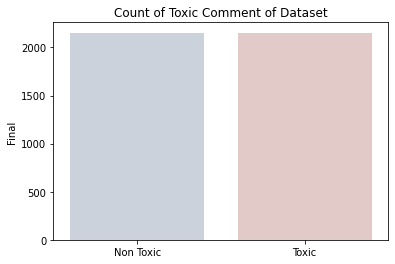

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(['Non Toxic', 'Toxic'], df['Final'].map({0:"Non Toxic", 1: "Toxic"}).value_counts(ascending=True), alpha=0.8,palette="vlag")

plt.title('Count of Toxic Comment of Dataset')

# 0. Crawl Data Go Bruh Bruh

In [14]:
#Import package
import chat_downloader #Thank xenova for creating this fookin vjppr0 lib
from chat_downloader import ChatDownloader
import os
import re
from openpyxl import Workbook #Now prepare a xlsx to write crawl data
wb = Workbook()
# grab the active worksheet
ws = wb.active
# Data can be assigned directly to cells
ws['A1'] = 'Content'
ws['A2'] = 'Final'
#Now copy and paste something like
url = 'https://www.youtube.com/watch?v=Ejzw6Htgj7c'#Only the football live stream which has chat replay
chat = ChatDownloader().get_chat(url=url,start_time=None,end_time=None)#Get chats from url
d = 0
lst = []
# Create a generator
for message in chat:
	"""Crawled chat should be like this
	{
    ...
    "message_id": "xxxxxxxxxx",
    "message": "actual message goes here",
    "message_type": "text_message",
    "timestamp": 1613761152565924,
    "time_in_seconds": 1234.56,
    "time_text": "20:34",
    "author": {
        "id": "UCxxxxxxxxxxxxxxxxxxxxxxx",
        "name": "username_of_sender",
        "images": [
            ...
        ],
        "badges": [
            ...
        ]
    },
    ...
}"""
	#In here we just get 7000 messages
	#if(d>7000):break
	if (len(message['message'])>1):# iterate over messages
			str = message['message']#Just take message content
			import re
			a = re.findall(':.*?:', str)#We will remove all emote, which start and end with char ':'
			for sub in a:
				str = str.replace(sub, '')
			# Now we try to remove all the same message content by create a substring without space char and check if it existed, write to file
			st=str.replace(' ','')
			if (str!='' and lst.count(st)==0):
			   ws.append([str])
			   lst.append(st)
			   d = d + 1
wb.save("DataCrawl.xlsx")


KeyboardInterrupt: ignored

Now we will take data file and 

# 1. Preprocess

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
X = df['Content']
y = df['Final']
WordSeg = []
for i in range(len(X)):
        sentence_strip = str(X[i]).strip()# Remove spaces at begin & end
        WordSeg.append(word_tokenize(sentence_strip, format='text')) # format text: add "_" where text is phrases.
X = pd.DataFrame(WordSeg) # Update new sentences
print(X)

In [ ]:
MAX_FEATURES = 200000 # number of words in the vocab

In [ ]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=50,
                               output_mode='int')

In [ ]:
vectorizer.adapt(X.values)

In [ ]:
vectorized_text = vectorizer(X.values)

In [ ]:
print(vectorized_text)

In [ ]:
print(vectorized_text)

In [ ]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [ ]:
train = dataset.take(int(len(dataset)*.6))
val = dataset.skip(int(len(dataset)*.6)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.8)).take(int(len(dataset)*.2))

# 2. Create Sequential Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import 
\

In [ ]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
# Final layer 
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [ ]:
model.summary()

In [ ]:
history = model.fit(train, epochs=15, validation_data=val)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3. Make Predictions

In [ ]:
input_text = vectorizer(['tụi m giỏi thì vào mà đá, ở đó mà sủa ngu'])

In [ ]:
print(input_text)

In [ ]:
res = model.predict(input_text)

In [ ]:
print(res)

In [ ]:
(res > 0.5).astype(int)

In [ ]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [ ]:
(model.predict(batch_X) > 0.5).astype(int)

In [ ]:
res.shape

In [ ]:
input_text = vectorizer(['Việt Nam vô địch'])

In [ ]:
print(input_text)

In [ ]:
res = model.predict(input_text)

In [ ]:
print(res)

In [ ]:
(res > 0.5).astype(int)

In [ ]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [ ]:
(model.predict(batch_X) > 0.5).astype(int)

In [ ]:
res.shape

In [ ]:
input_text = vectorizer(['Việt Nam vô địt'])

In [ ]:
print(input_text)

In [ ]:
res = model.predict(input_text)

In [ ]:
print(res)

In [ ]:
(res > 0.5).astype(int)

In [ ]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [ ]:
(model.predict(batch_X) > 0.5).astype(int)

In [ ]:
res.shape

In [ ]:
input_text = vectorizer(['chửi chết nó đi anh em'])

In [ ]:
print(input_text)

In [ ]:
res = model.predict(input_text)

In [ ]:
print(res)

In [ ]:
(res > 0.5).astype(int)

In [ ]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [ ]:
(model.predict(batch_X) > 0.5).astype(int)

In [ ]:
res.shape

# 4. Evaluate Model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    print(batch)
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    print(y_true)
    yhat = yhat.flatten()
    print(yhat)
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

In [ ]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    print(yhat)
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)